In [1]:
from google.colab import drive
drive.mount('/content/drive')

!pip install stable-baselines3[extra] pandas numpy matplotlib gymnasium

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install ta causal-learn networkx seaborn stable_baselines3

In [3]:
%cd /content/drive/MyDrive/RL_Portfolio/

/content/drive/MyDrive/RL_Portfolio


In [4]:
!python3 causal_data_loader.py


🔄 Running causal data pipeline...
🚀 Starting causal portfolio data collection pipeline...
📊 Target assets: 20
🌍 Macro indicators: 35
💾 Save directory: data

=== STEP 1: Stock Data ===
📊 Downloading stock data for 20 tickers...
  [1/20] Downloading AAPL... (attempt 1)
  ✅ AAPL: 1509 rows
  [2/20] Downloading MSFT... (attempt 1)
  ✅ MSFT: 1509 rows
  [3/20] Downloading GOOGL... (attempt 1)
  ✅ GOOGL: 1509 rows
  [4/20] Downloading AMZN... (attempt 1)
  ✅ AMZN: 1509 rows
  [5/20] Downloading NVDA... (attempt 1)
  ✅ NVDA: 1509 rows
  [6/20] Downloading JPM... (attempt 1)
  ✅ JPM: 1509 rows
  [7/20] Downloading BAC... (attempt 1)
  ✅ BAC: 1509 rows
  [8/20] Downloading GS... (attempt 1)
  ✅ GS: 1509 rows
  [9/20] Downloading WFC... (attempt 1)
  ✅ WFC: 1509 rows
  [10/20] Downloading XOM... (attempt 1)
  ✅ XOM: 1509 rows
  [11/20] Downloading CVX... (attempt 1)
  ✅ CVX: 1509 rows
  [12/20] Downloading COP... (attempt 1)
  ✅ COP: 1509 rows
  [13/20] Downloading PG... (attempt 1)
  ✅ PG: 1509

In [ ]:
!python causal_graph_builder.py

🚀 Financial Causal Graph Builder Demo
✅ Loaded causal data:
   Shape: (1474, 20, 15)
   Tickers: 20
   Features: 15
   Date range: 2018-02-22 to 2023-12-29

🎯 SINGLE ASSET CAUSAL DISCOVERY

📈 Analyzing AAPL...

🎯 Discovering causal graph for AAPL
   Algorithms: ['PC', 'GES', 'ICALiNGAM']
   Max features: 12
📊 AAPL: Selected 12 features for causal discovery (FORCED log_return)
   Features: ['log_return', 'macro_gold_return', 'volatility', 'macro_sp500_return', 'return', 'macro_treasury_10y_return', 'momentum_10', 'macro_oil_return', 'bb_position', 'atr', 'macd', 'rsi']
🔍 Running PC algorithm (alpha=0.05)...
Depth=4, working on node 11: 100% 12/12 [00:00<00:00, 5088.12it/s]
✅ PC completed: 34 edges found
🔍 Running GES algorithm (score=local_score_BIC)...
✅ GES completed: 42 edges found
🔍 Running ICALiNGAM algorithm...
✅ ICALiNGAM completed: 30 edges found
✅ Causal discovery completed for AAPL

📊 Visualizing causal graphs for AAPL...
   Creating PC visualization...
Figure(1000x800)
   Cre

In [ ]:
# --- CORRECTED CAUSAL ANALYSIS ---
import pickle
import json
import numpy as np

# Load the detailed results
with open('/content/drive/MyDrive/RL_Portfolio/data/causal_results.pkl', 'rb') as f:
    results = pickle.load(f)

# Let's inspect the results for a single asset, for example, AAPL
aapl_results = results.get('AAPL')

if aapl_results:
    print("--- Causal Analysis for AAPL ---")

    # Get the list of algorithms that were actually run for this asset
    available_algorithms = list(aapl_results['algorithms'].keys())
    print(f"\nAvailable algorithms in the results file: {available_algorithms}")

    # --- START OF THE FIX ---
    # We will now inspect the 'GES' results, which we know exist.

    target_algorithm = 'GES'
    if target_algorithm in available_algorithms:
        # Get the features that were used for this specific analysis
        feature_names = aapl_results['algorithms'][target_algorithm]['feature_names']
        print(f"\nFeatures used for {target_algorithm} analysis:")
        print(feature_names)

        # Print the graph found by the GES algorithm
        ges_graph_matrix = aapl_results['algorithms'][target_algorithm]['graph']
        print(f"\n{target_algorithm} Algorithm Causal Matrix:")
        print(ges_graph_matrix)

        # Let's find what causes 'log_return' according to GES
        if 'log_return' in feature_names:
            return_index = feature_names.index('log_return')

            print(f"\nFactors causing 'log_return' for AAPL (according to {target_algorithm}):")
            causes = []
            for i, name in enumerate(feature_names):
                # Check for an arrow from feature 'i' TO 'log_return'
                if ges_graph_matrix[i, return_index] != 0:
                    causes.append(name)

            if causes:
                for cause in causes:
                    print(f"  - {cause}")
            else:
                print("  - None found.")
    else:
        print(f"\nCould not find results for '{target_algorithm}'. Please check available algorithms.")

else:
    print("Could not find results for AAPL.")

# --- END OF CORRECTED ANALYSIS ---

--- Causal Analysis for AAPL ---

Available algorithms in the results file: ['GES', 'Granger']

Features used for GES analysis:
['log_return', 'macro_treasury_10y_return', 'momentum_10', 'macro_oil_return', 'bb_position', 'atr', 'macd', 'rsi']

GES Algorithm Causal Matrix:
[[ 0  1  0  1  1  0 -1  1]
 [-1  0  0  0  0  0  0  0]
 [ 0  0  0  0 -1  0 -1 -1]
 [-1  0  0  0  0  0  0  0]
 [-1  0 -1  0  0  0 -1 -1]
 [ 0  0  0  0  0  0  0 -1]
 [ 1  0  1  0  1  0  0  1]
 [-1  0 -1  0 -1 -1 -1  0]]

Factors causing 'log_return' for AAPL (according to GES):
  - macro_treasury_10y_return
  - macro_oil_return
  - bb_position
  - macd
  - rsi


In [ ]:
!python fixed_causal_builder.py

🚀 Financial Causal Graph Builder Demo
✅ Loaded causal data:
   Shape: (1474, 20, 15)
   Tickers: 20
   Features: 15
   Date range: 2018-02-22 to 2023-12-29

🎯 SINGLE ASSET CAUSAL DISCOVERY - BOTH MODES

📈 Analyzing AAPL...

🔴 Running FORCED mode for AAPL...

🎯 Discovering causal graph for AAPL (FORCED log_return)
   Algorithms: ['PC', 'GES', 'ICALiNGAM']
   Max features: 12
📊 AAPL: Selected 12 features for causal discovery (FORCED log_return)
   Features: ['log_return', 'macro_gold_return', 'volatility', 'macro_sp500_return', 'return', 'macro_treasury_10y_return', 'momentum_10', 'macro_oil_return', 'bb_position', 'atr', 'macd', 'rsi']
🔍 Running PC algorithm (alpha=0.05)...
Depth=4, working on node 11: 100% 12/12 [00:00<00:00, 5058.97it/s]
✅ PC completed: 34 edges found
🔍 Running GES algorithm (score=local_score_BIC)...
✅ GES completed: 42 edges found
🔍 Running ICALiNGAM algorithm...
✅ ICALiNGAM completed: 30 edges found
✅ Causal discovery completed for AAPL (FORCED log_return)

🔵 Runni

In [5]:
!python save_causal_builder.py

🏷️  GOOGLE COLAB VERSION - AUTO-SAVE ENABLED
🚀 Setting up Google Colab environment for Causal Analysis...
✅ Colab environment ready!
📁 Data directory created: ./data/
🎨 Visualizations will be auto-saved to: ./data/visualizations/

🎯 Run main() to start the causal analysis demo!
🚀 Financial Causal Graph Builder Demo - AUTO-SAVE VERSION
🏷️  Perfect for Google Colab - All visualizations auto-saved!
📁 Visualization directories created in: data/visualizations
✅ Loaded causal data:
   Shape: (1474, 20, 15)
   Tickers: 20
   Features: 15
   Date range: 2018-02-22 to 2023-12-29

🎯 SINGLE ASSET CAUSAL DISCOVERY - BOTH MODES

📈 Analyzing AAPL...

🔴 Running FORCED mode for AAPL...

🎯 Discovering causal graph for AAPL (FORCED log_return)
   Algorithms: ['PC', 'GES', 'ICALiNGAM']
   Max features: 12
📊 AAPL: Selected 12 features for causal discovery (FORCED log_return)
   Features: ['log_return', 'macro_gold_return', 'volatility', 'macro_sp500_return', 'return', 'macro_treasury_10y_return', 'momentu

In [6]:
# --- FINAL, COMPREHENSIVE CAUSAL ANALYSIS ---
import pickle
import pandas as pd
import numpy as np

# Load the detailed results for all assets
with open('/content/drive/MyDrive/RL_Portfolio/data/causal_results.pkl', 'rb') as f:
    results = pickle.load(f)

# A dictionary to count how many times each feature is found to be a cause of returns
causal_driver_counts = {}

print("--- Analyzing Causal Drivers Across All Assets and Algorithms ---")

# Loop through each asset in our results
for ticker, asset_results in results.items():
    print(f"\n--- Analyzing {ticker} ---")

    # Loop through each algorithm's findings for that asset
    for algo_name, algo_result in asset_results['algorithms'].items():
        feature_names = algo_result.get('feature_names', [])

        if 'log_return' not in feature_names:
            continue

        return_index = feature_names.index('log_return')

        # --- START OF THE FIX ---
        # Get the causal matrix based on the algorithm type
        adj_matrix = None
        if algo_name in ['PC', 'GES']:
            adj_matrix = algo_result.get('graph')
        elif 'LiNGAM' in algo_name:
            adj_matrix = algo_result.get('adjacency_matrix')
        elif algo_name == 'Granger':
            # For Granger, we create a binary matrix where p-value < 0.05 indicates a causal link
            granger_matrix = algo_result.get('granger_matrix')
            if granger_matrix is not None:
                adj_matrix = (granger_matrix < 0.05).astype(int)
        # --- END OF THE FIX ---

        if adj_matrix is None:
            print(f"  Algorithm: {algo_name} - Could not find graph matrix.")
            continue

        print(f"  Algorithm: {algo_name}")
        found_causes = []

        # Find what causes 'log_return'
        for i, name in enumerate(feature_names):
            if i != return_index and adj_matrix[i, return_index] != 0:
                found_causes.append(name)
                causal_driver_counts[name] = causal_driver_counts.get(name, 0) + 1

        if found_causes:
            print(f"    - Causal drivers found: {', '.join(found_causes)}")

# --- FINAL SUMMARY ---
print("\n" + "="*50)
print("🏆 FINAL RANKING OF CAUSAL DRIVERS (COMPLETE)")
print("   (Count of how many times a feature was found to cause log_return)")
print("="*50)

if causal_driver_counts:
    # Sort the results by count
    sorted_drivers = sorted(causal_driver_counts.items(), key=lambda item: item[1], reverse=True)

    for driver, count in sorted_drivers:
        print(f"{driver}: {count}")
else:
    print("No causal drivers for 'log_return' were found across all assets and algorithms.")

--- Analyzing Causal Drivers Across All Assets and Algorithms ---

--- Analyzing AAPL_forced ---
  Algorithm: GES
    - Causal drivers found: macro_treasury_10y_return, macro_oil_return, bb_position, macd, rsi
  Algorithm: Granger
    - Causal drivers found: macro_treasury_10y_return, momentum_10, macro_oil_return, bb_position, atr, macd, rsi

--- Analyzing AAPL_free ---
  Algorithm: GES
    - Causal drivers found: macro_treasury_10y_return, macro_oil_return, bb_position, macd, rsi
  Algorithm: Granger
    - Causal drivers found: macro_treasury_10y_return, momentum_10, macro_oil_return, bb_position, atr, macd, rsi

--- Analyzing MSFT_forced ---
  Algorithm: GES
    - Causal drivers found: macro_treasury_10y_return, momentum_10, macro_oil_return, bb_position
  Algorithm: Granger
    - Causal drivers found: macro_treasury_10y_return, momentum_10, macro_oil_return, bb_position, atr, macd, rsi

--- Analyzing MSFT_free ---
  Algorithm: GES
    - Causal drivers found: macro_treasury_10y_retu

# New section

In [38]:
# --- SCRIPT TO TRAIN THE BASELINE (NON-CAUSAL) AGENT (CORRECTED) ---

import os
from stable_baselines3 import A2C
from stable_baselines3.common.env_util import make_vec_env

from portfolio_env3 import EnhancedPortfolioEnv
from causal_portfolio_env import load_causal_data_for_env
# ---

# --- Configuration ---
DATA_DIR = 'data'
MODELS_DIR = 'models'
LOG_DIR = 'logs'
os.makedirs(MODELS_DIR, exist_ok=True)
os.makedirs(LOG_DIR, exist_ok=True)

MODEL_NAME = "A2C_NonCausal_Baseline"
TOTAL_TIMESTEPS = 60000

# --- Load Data and Create the Non-Causal Environment ---
print("🚀 Setting up the NON-CAUSAL baseline environment...")

# --- FIX: Use the correct data loading function ---
# We load the causal data and ignore the 'causal_results' with a '_'
data_tensor, metadata, _ = load_causal_data_for_env(DATA_DIR)
# ---

env_kwargs = {
    'data_tensor': data_tensor,
    'metadata': metadata,
    'risk_aversion_multiplier': 0.8 # A default value
}
env = make_vec_env(EnhancedPortfolioEnv, n_envs=1, env_kwargs=env_kwargs)
print("✅ Baseline environment created successfully!")


# --- Define and Train the A2C Agent ---
print(f"\n🤖 Defining and Training the {MODEL_NAME} Agent...")
policy_kwargs = dict(net_arch=dict(pi=[128, 128], vf=[128, 128]))
model = A2C(
    policy='MlpPolicy',
    env=env,
    verbose=1,
    learning_rate=0.0007,
    policy_kwargs=policy_kwargs,
    tensorboard_log=LOG_DIR
)

print(f"🧠 Training will run for {TOTAL_TIMESTEPS} timesteps...")
model.learn(
    total_timesteps=TOTAL_TIMESTEPS,
    tb_log_name=MODEL_NAME
)

# --- Save the Final Model ---
final_model_path = os.path.join(MODELS_DIR, f"final_{MODEL_NAME}")
model.save(final_model_path)
print(f"\n🎉 Baseline model training complete! Saved to: {final_model_path}.zip")

🚀 Setting up the NON-CAUSAL baseline environment...
🏗️ Initializing Enhanced Portfolio Environment with provided data...
✅ Environment ready: 1474 steps, 20 assets, 15 features
🎯 Observation space: 243 dimensions
✅ Baseline environment created successfully!

🤖 Defining and Training the A2C_NonCausal_Baseline Agent...
Using cpu device
🧠 Training will run for 60000 timesteps...
Logging to logs/A2C_NonCausal_Baseline_18
------------------------------------
| time/                 |          |
|    fps                | 773      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -28.4    |
|    explained_variance | -1.31    |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -0.187   |
|    std                | 0.999    |
|    value_loss         | 0.000168 |
------------------------------------
------------------------

In [37]:
import os
import numpy as np
from stable_baselines3 import A2C
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.env_util import make_vec_env

# Make sure the new environment file is in your project directory
from causal_portfolio_env import CausalPortfolioEnv, load_causal_data_for_env

# --- 1. Define Configuration and Directories ---
DATA_DIR = 'data'
MODELS_DIR = 'models'
LOG_DIR = 'logs'
os.makedirs(MODELS_DIR, exist_ok=True)
os.makedirs(LOG_DIR, exist_ok=True)

MODEL_NAME = "A2C_Causal_Portfolio_v1"
TOTAL_TIMESTEPS = 60000  # Timesteps for training

# --- 2. Load Data and Create the Causal Environment ---
print("🚀 Step 1: Loading data and setting up the causal environment...")

try:
    # Load all the necessary data using the new helper function
    data_tensor, metadata, causal_results = load_causal_data_for_env(DATA_DIR)

    # Define environment arguments
    env_kwargs = {
        'data_tensor': data_tensor,
        'metadata': metadata,
        'causal_results': causal_results,
        'causal_lookback': 10,  # Agent sees 10 days of causal history
        'lookback_window': 30,
        # Agent sees 30 days of its own performance
    }

    # Create a vectorized environment (required by Stable Baselines3)
    env = make_vec_env(CausalPortfolioEnv, n_envs=1, env_kwargs=env_kwargs)
    print("✅ Causal environment created successfully!")

except FileNotFoundError as e:
    print(f"❌ ERROR: {e}")
    print("Please ensure 'causal_market_tensor.npy', 'causal_metadata.json', and 'causal_results.pkl' are in the 'data' directory.")
    # Stop execution if data is missing
    raise

# --- 3. Define and Train the A2C Agent ---
print(f"\n🚀 Step 2: Defining and Training the {MODEL_NAME} Agent...")

# A2C hyperparameters, chosen for financial time-series tasks
policy_kwargs = dict(net_arch=dict(pi=[128, 128], vf=[128, 128]))

model = A2C(
    policy='MlpPolicy',
    env=env,
    verbose=1,
    gamma=0.98,            # Discount factor for future rewards
    n_steps=5,             # Number of steps to collect data before updating policy
    ent_coef=0.01,         # Entropy coefficient to encourage exploration
    learning_rate=0.0001,  # Step size for the optimizer
    vf_coef=0.5,           # Weight of the value function loss
    max_grad_norm=0.5,     # Maximum norm for gradient clipping to prevent explosions
    policy_kwargs=policy_kwargs,
    tensorboard_log=LOG_DIR
)

# Set up a callback to save the best model found during training
eval_callback = EvalCallback(
    env,
    best_model_save_path=os.path.join(MODELS_DIR, f'best_{MODEL_NAME}'),
    log_path=os.path.join(LOG_DIR, f'best_{MODEL_NAME}'),
    eval_freq=1000,  # Evaluate the model every 1000 steps
    deterministic=True,
    render=False
)

print(f"\n🧠 Training will run for {TOTAL_TIMESTEPS} timesteps...")
print("This may take some time depending on your hardware.")
print(f"📊 TensorBoard logs will be saved in the '{LOG_DIR}' directory.")

# Train the model!
model.learn(
    total_timesteps=TOTAL_TIMESTEPS,
    callback=eval_callback,
    tb_log_name=MODEL_NAME
)

# --- 4. Save the Final Trained Model ---
print("\n🚀 Step 3: Saving the final model...")
final_model_path = os.path.join(MODELS_DIR, f"final_{MODEL_NAME}")
model.save(final_model_path)

print("\n🎉 Training complete!")
print(f"💾 Final model saved to: {final_model_path}.zip")
print(f"🏆 Best performing model during training saved in: {MODELS_DIR}/")
print("\nNext, we will evaluate the performance of this trained agent. 📈")

🚀 Step 1: Loading data and setting up the causal environment...
🧠 Identifying causal drivers...
  - AAPL: Found 7 causal drivers.
  - MSFT: Found 7 causal drivers.
  - GOOGL: Found 6 causal drivers.
  - AMZN: Found 7 causal drivers.
  - NVDA: Found 5 causal drivers.
  - JPM: Found 7 causal drivers.
  - BAC: Found 7 causal drivers.
  - GS: Found 7 causal drivers.
  - WFC: Found 7 causal drivers.
  - XOM: Found 6 causal drivers.
  - CVX: Found 6 causal drivers.
  - COP: Found 6 causal drivers.
  - PG: Found 7 causal drivers.
  - JNJ: Found 7 causal drivers.
  - KO: Found 7 causal drivers.
  - UNH: Found 7 causal drivers.
  - CAT: Found 5 causal drivers.
  - HD: Found 7 causal drivers.
  - BA: Found 6 causal drivers.
  - SPY: Found 6 causal drivers.
✅ Environment Ready: Focused on top 3 drivers. Observation Space: 650 dims.
✅ Causal environment created successfully!

🚀 Step 2: Defining and Training the A2C_Causal_Portfolio_v1 Agent...
Using cpu device

🧠 Training will run for 60000 timest

🚀 Step 1: Loading data...
✅ Data loaded successfully.

🤖 Evaluating Causal RL Agent...
🧠 Identifying causal drivers...
  - AAPL: Found 7 causal drivers.
  - MSFT: Found 7 causal drivers.
  - GOOGL: Found 6 causal drivers.
  - AMZN: Found 7 causal drivers.
  - NVDA: Found 5 causal drivers.
  - JPM: Found 7 causal drivers.
  - BAC: Found 7 causal drivers.
  - GS: Found 7 causal drivers.
  - WFC: Found 7 causal drivers.
  - XOM: Found 6 causal drivers.
  - CVX: Found 6 causal drivers.
  - COP: Found 6 causal drivers.
  - PG: Found 7 causal drivers.
  - JNJ: Found 7 causal drivers.
  - KO: Found 7 causal drivers.
  - UNH: Found 7 causal drivers.
  - CAT: Found 5 causal drivers.
  - HD: Found 7 causal drivers.
  - BA: Found 6 causal drivers.
  - SPY: Found 6 causal drivers.
✅ Environment Ready: Focused on top 3 drivers. Observation Space: 650 dims.

🔄 Evaluating Baseline RL Agent...
🏗️ Initializing Enhanced Portfolio Environment with provided data...
✅ Environment ready: 1474 steps, 20 asse

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


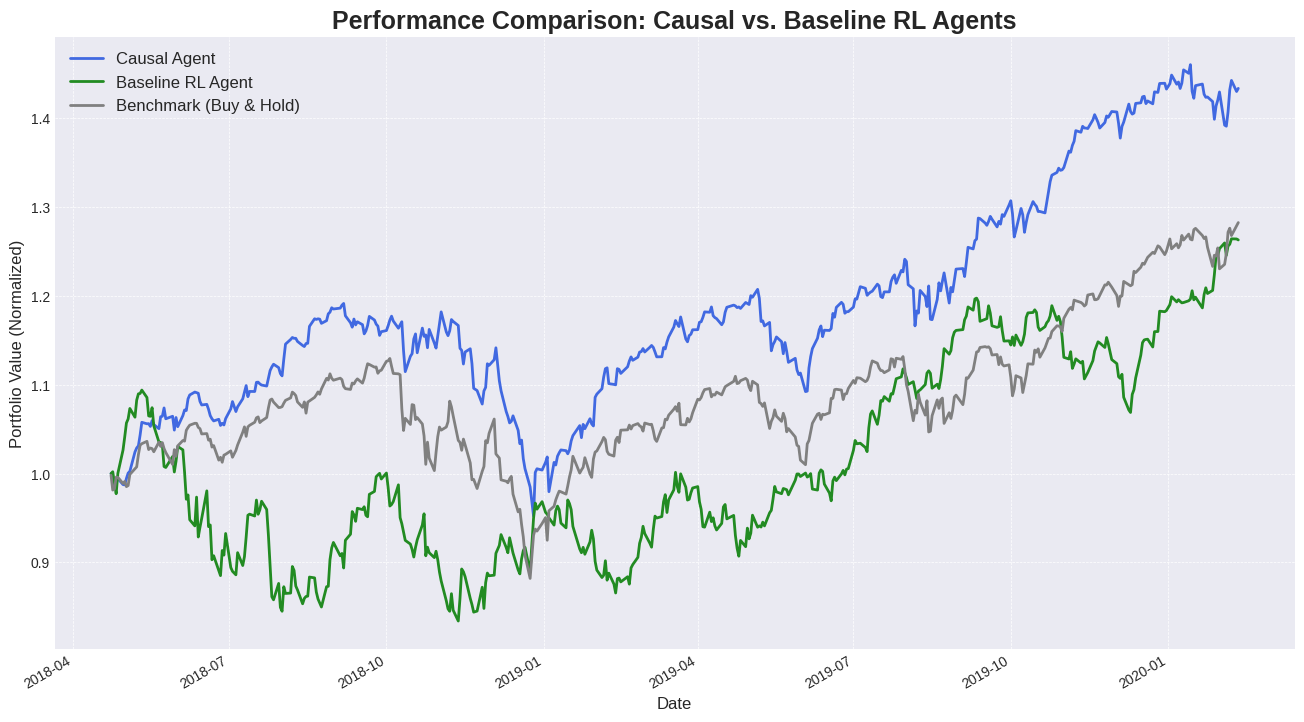

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from stable_baselines3 import A2C

# Import both environment classes
from causal_portfolio_env import CausalPortfolioEnv, load_causal_data_for_env
from portfolio_env3 import EnhancedPortfolioEnv

# --- Configuration ---
DATA_DIR = 'data'
MODELS_DIR = 'models'

# --- Correct model base names ---
BASELINE_MODEL_NAME = "A2C_NonCausal_Baseline"
CAUSAL_MODEL_NAME = "final_A2C_Causal_Portfolio_v1"
# ---

def run_backtest(model, env):
    """Runs a full backtest for a given model and environment."""
    obs, _ = env.reset()
    done = False
    portfolio_values = [env.portfolio_value]
    while not done:
        action, _ = model.predict(obs, deterministic=True)
        obs, _, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        portfolio_values.append(info.get('portfolio_value', 1.0))
    return np.array(portfolio_values)

# --- 1. Load Data ---
print("🚀 Step 1: Loading data...")
data_tensor, metadata, causal_results = load_causal_data_for_env(DATA_DIR)
print("✅ Data loaded successfully.")

# --- 2. Evaluate Causal Model ---
print("\n🤖 Evaluating Causal RL Agent...")
# FIX: Load using the base name. stable-baselines3 adds the '.zip'
causal_model_path = os.path.join(MODELS_DIR, CAUSAL_MODEL_NAME)
causal_model = A2C.load(causal_model_path)
causal_env = CausalPortfolioEnv(data_tensor, metadata, causal_results)
causal_values = run_backtest(causal_model, causal_env)

# --- 3. Evaluate Baseline (Non-Causal) Model ---
print("\n🔄 Evaluating Baseline RL Agent...")
# FIX: Load using the base name with the 'final_' prefix from when it was saved
baseline_model_path = os.path.join(MODELS_DIR, f"final_{BASELINE_MODEL_NAME}")
baseline_model = A2C.load(baseline_model_path)
baseline_env = EnhancedPortfolioEnv(data_tensor, metadata, risk_aversion_multiplier=0.5)
baseline_values = run_backtest(baseline_model, baseline_env)

# --- 4. Create Results DataFrame ---
print("\n📊 Calculating and compiling results...")
start_idx = causal_env.lookback_window + causal_env.causal_lookback + 1
dates = pd.to_datetime(metadata['dates'])[start_idx:]
min_len = min(len(dates), len(causal_values), len(baseline_values))
dates = dates[:min_len]

results_df = pd.DataFrame(index=dates)
results_df['Causal Agent'] = causal_values[:min_len]
results_df['Baseline RL Agent'] = baseline_values[:min_len]

# Add Buy & Hold Benchmark
return_idx = metadata['feature_names'].index('return')
benchmark_returns = np.mean(data_tensor[start_idx:start_idx+min_len, :, return_idx], axis=1)
results_df['Benchmark (Buy & Hold)'] = (1 + benchmark_returns).cumprod()

# --- 5. Performance Calculation & Display ---
def calculate_metrics(values):
    returns = values.pct_change().dropna()
    total_return = (values.iloc[-1] / values.iloc[0]) - 1
    sharpe_ratio = returns.mean() / returns.std() * np.sqrt(252) if returns.std() != 0 else 0
    cumulative = (1 + returns).cumprod()
    peak = cumulative.expanding(min_periods=1).max()
    drawdown = (cumulative - peak) / peak
    max_drawdown = drawdown.min() if not drawdown.empty else 0
    return {
        "Total Return": f"{total_return:.2%}",
        "Sharpe Ratio": f"{sharpe_ratio:.2f}",
        "Max Drawdown": f"{max_drawdown:.2%}"
    }

print("\n--- Final Performance Summary ---")
for col in results_df.columns:
    print(f"\n--- {col} ---")
    metrics = calculate_metrics(results_df[col])
    for key, value in metrics.items(): print(f"  - {key}: {value}")
print("---------------------------------")

# --- 6. Visualization ---
print("\n📈 Generating performance plot...")
plt.style.use('seaborn-v0_8-darkgrid')
results_df.plot(figsize=(16, 9), linewidth=2, color=['royalblue', 'forestgreen', 'gray'])
plt.title('Performance Comparison: Causal vs. Baseline RL Agents', fontsize=18, weight='bold')
plt.ylabel('Portfolio Value (Normalized)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from stable_baselines3 import A2C, PPO

# Import both environment classes
from causal_portfolio_env import CausalPortfolioEnv, load_causal_data_for_env
from portfolio_env3 import EnhancedPortfolioEnv

# --- Configuration ---
DATA_DIR = 'data'
MODELS_DIR = 'models'

# --- ‼️ Double-check these filenames match your saved models ---
BASELINE_MODEL_NAME = "A2C_NonCausal_Baseline"
CAUSAL_MODEL_NAME = "final_A2C_Causal_Portfolio_v1"
# ---

# --- Backtesting Function ---
def run_backtest(model, env):
    """Runs a full backtest for a given model and environment."""
    obs, _ = env.reset()
    done = False
    portfolio_values = [env.portfolio_value]
    while not done:
        action, _ = model.predict(obs, deterministic=True)
        obs, _, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        portfolio_values.append(info.get('portfolio_value', 1.0))
    return np.array(portfolio_values)

# ==============================================================================
#                              MAIN SCRIPT
# ==============================================================================

# --- 1. Load Data ---
print("🚀 Step 1: Loading all necessary data...")
data_tensor, metadata, causal_results = load_causal_data_for_env(DATA_DIR)
print("✅ Data loaded successfully.")

# --- 2. Evaluate Causal Model ---
print("\n🤖 Evaluating Causal PPO Agent...")
try:
    causal_model_path = os.path.join(MODELS_DIR, f"{CAUSAL_MODEL_NAME}.zip")
    causal_model = A2C.load(causal_model_path)
    env_kwargs = {
        'data_tensor': data_tensor,
        'metadata': metadata,
        'causal_results': causal_results,
        'num_causal_drivers': 3,

    }
    causal_env = CausalPortfolioEnv(**env_kwargs)
    causal_values = run_backtest(causal_model, causal_env)
except FileNotFoundError:
    print(f"❌ ERROR: Causal model not found at {causal_model_path}. Please ensure it is trained and saved correctly.")
    causal_values = None

# --- 3. Evaluate Baseline (Non-Causal) Model ---
print("\n🔄 Evaluating Baseline A2C Agent...")
try:
    baseline_model_path = os.path.join(MODELS_DIR, f"final_{BASELINE_MODEL_NAME}.zip")
    baseline_model = A2C.load(baseline_model_path)
    baseline_env = EnhancedPortfolioEnv(data_tensor, metadata, risk_aversion_multiplier=0.5)
    baseline_values = run_backtest(baseline_model, baseline_env)
except FileNotFoundError:
    print(f"❌ ERROR: Baseline model not found at {baseline_model_path}. Please ensure it is trained and saved correctly.")
    baseline_values = None

# --- 4. Create Results DataFrame ---
if causal_values is not None and baseline_values is not None:
    print("\n📊 Calculating and compiling results...")
    start_idx = causal_env.lookback_window + causal_env.causal_lookback + 1
    dates = pd.to_datetime(metadata['dates'])[start_idx:]
    min_len = min(len(dates), len(causal_values), len(baseline_values))
    dates = dates[:min_len]

    results_df = pd.DataFrame(index=dates)
    results_df['Causal Agent'] = causal_values[:min_len]
    results_df['Baseline RL Agent'] = baseline_values[:min_len]

    return_idx = metadata['feature_names'].index('return')
    benchmark_returns = np.mean(data_tensor[start_idx:start_idx+min_len, :, return_idx], axis=1)
    results_df['Benchmark (Buy & Hold)'] = (1 + benchmark_returns).cumprod()

    # --- 5. Performance Calculation & Display ---
    def calculate_metrics(values):
        returns = values.pct_change().dropna()
        total_return = (values.iloc[-1] / values.iloc[0]) - 1
        sharpe_ratio = returns.mean() / returns.std() * np.sqrt(252) if returns.std() != 0 else 0
        cumulative = (1 + returns).cumprod()
        peak = cumulative.expanding(min_periods=1).max()
        drawdown = (cumulative - peak) / peak
        max_drawdown = drawdown.min() if not drawdown.empty else 0
        return {
            "Total Return": f"{total_return:.2%}",
            "Sharpe Ratio": f"{sharpe_ratio:.2f}",
            "Max Drawdown": f"{max_drawdown:.2%}"
        }

    print("\n--- Final Performance Summary ---")
    for col in results_df.columns:
        print(f"\n--- {col} ---")
        metrics = calculate_metrics(results_df[col])
        for key, value in metrics.items(): print(f"  - {key}: {value}")
    print("---------------------------------")

    # --- 6. Visualization ---
    print("\n📈 Generating final performance plot...")
    plt.style.use('seaborn-v0_8-darkgrid')
    results_df.plot(figsize=(16, 9), linewidth=2, color=['royalblue', 'forestgreen', 'gray'])
    plt.title('Performance Comparison: Causal vs. Baseline RL Agents', fontsize=18, weight='bold')
    plt.ylabel('Portfolio Value (Normalized)', fontsize=12)
    plt.xlabel('Date', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()
else:
    print("\nSkipping final analysis because one or both models could not be loaded.")

🚀 Step 1: Loading all necessary data...
✅ Data loaded successfully.

🤖 Evaluating Causal PPO Agent...


/usr/local/lib/python3.12/dist-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run A2C on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


TypeError: CausalPortfolioEnv.__init__() got an unexpected keyword argument 'risk_aversion_multiplier'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
from stable_baselines3 import A2C

# Import your custom environment classes
from causal_portfolio_env import CausalPortfolioEnv
from portfolio_env3 import EnhancedPortfolioEnv, load_enhanced_portfolio_data

# --- Configuration ---
DATA_DIR = 'data'
MODELS_DIR = 'models'
BASELINE_MODEL_NAME = "A2C_NonCausal_Baseline"
CAUSAL_MODEL_NAME = "final_A2C_Causal_Portfolio_v1"

def run_detailed_backtest(model, env):
    """Runs a backtest and records values, returns, and weights."""
    obs, _ = env.reset()
    done = False

    portfolio_values = [env.portfolio_value]
    daily_returns = [0.0]
    all_weights = [env.weights]

    while not done:
        action, _ = model.predict(obs, deterministic=True)
        obs, _, terminated, truncated, info = env.step(action)
        done = terminated or truncated

        current_value = info.get('portfolio_value', 1.0)
        prev_value = portfolio_values[-1]
        daily_returns.append((current_value / prev_value) - 1)

        portfolio_values.append(current_value)
        all_weights.append(env.weights)

    return pd.Series(portfolio_values, name="value"), pd.Series(daily_returns, name="return"), pd.DataFrame(all_weights)

# --- 1. Load Data and Models ---
print("🚀 Loading data and models for detailed analysis...")
data_tensor, metadata, causal_results = load_causal_data_for_env(DATA_DIR)

# Load Causal Model
causal_model_path = os.path.join(MODELS_DIR, f"{CAUSAL_MODEL_NAME}.zip")
causal_model = A2C.load(causal_model_path)
env_kwargs_causal = {'data_tensor': data_tensor, 'metadata': metadata, 'causal_results': causal_results}
causal_env = CausalPortfolioEnv(**env_kwargs_causal)

# Load Baseline Model
baseline_model_path = os.path.join(MODELS_DIR, f"final_{BASELINE_MODEL_NAME}.zip")
baseline_model = A2C.load(baseline_model_path)
baseline_env = EnhancedPortfolioEnv(data_tensor, metadata)

# --- 2. Run Detailed Backtests ---
print("🔄 Running detailed backtests...")
causal_vals, causal_rets, causal_wgts = run_detailed_backtest(causal_model, causal_env)
baseline_vals, baseline_rets, baseline_wgts = run_detailed_backtest(baseline_model, baseline_env)

# --- 3. Generate Plots ---
print("📈 Generating paper-quality plots...")
plt.style.use('seaborn-v0_8-whitegrid')

# Plot 1: Trading Activity (Turnover)
causal_turnover = causal_wgts.diff().abs().sum(axis=1)
baseline_turnover = baseline_wgts.diff().abs().sum(axis=1)
turnover_data = {
    'Causal Agent': causal_turnover.mean(),
    'Baseline RL Agent': baseline_turnover.mean()
}
plt.figure(figsize=(8, 6))
sns.barplot(x=list(turnover_data.keys()), y=list(turnover_data.values()))
plt.title('Average Daily Portfolio Turnover', fontsize=16)
plt.ylabel('Turnover (Sum of Weight Changes)', fontsize=12)
plt.savefig('trading_activity.png', dpi=300, bbox_inches='tight')
print("✅ Saved trading_activity.png")
plt.show()

# Plot 2: Return Distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(causal_rets, label='Causal Agent', lw=2.5, fill=True, alpha=0.5)
sns.kdeplot(baseline_rets, label='Baseline RL Agent', lw=2.5, fill=True, alpha=0.5)
plt.title('Distribution of Daily Returns', fontsize=16)
plt.xlabel('Daily Return', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=12)
plt.savefig('return_distribution.png', dpi=300, bbox_inches='tight')
print("✅ Saved return_distribution.png")
plt.show()

# Plot 3: Rolling Sharpe Ratio
rolling_sharpe_causal = causal_rets.rolling(window=60).mean() / causal_rets.rolling(window=60).std() * np.sqrt(252)
rolling_sharpe_baseline = baseline_rets.rolling(window=60).mean() / baseline_rets.rolling(window=60).std() * np.sqrt(252)

plt.figure(figsize=(12, 6))
rolling_sharpe_causal.plot(label='Causal Agent', lw=2.5)
rolling_sharpe_baseline.plot(label='Baseline RL Agent', lw=2.5)
plt.title('60-Day Rolling Sharpe Ratio', fontsize=16)
plt.xlabel('Date (Time Steps)', fontsize=12)
plt.ylabel('Sharpe Ratio (Annualized)', fontsize=12)
plt.axhline(0, color='black', linestyle='--', lw=1)
plt.legend(fontsize=12)
plt.savefig('rolling_sharpe.png', dpi=300, bbox_inches='tight')
print("✅ Saved rolling_sharpe.png")
plt.show()

In [ ]:
import os
from stable_baselines3 import PPO  # --- NEW: Import PPO ---
from stable_baselines3.common.env_util import make_vec_env
from causal_rl_environment import CausalPortfolioEnv, load_causal_data_for_env

# Configuration
DATA_DIR = 'data'
MODELS_DIR = 'models'
LOG_DIR = 'logs'
os.makedirs(MODELS_DIR, exist_ok=True)

MODEL_NAME = "PPO_Causal_Agent" # --- NEW: Updated model name
TOTAL_TIMESTEPS = 80000 # Increased timesteps for the more powerful agent

# Load Data and Create the Upgraded Environment
print("--- Training UPGRADED Causal Agent (PPO) ---")
data_tensor, metadata, causal_results = load_causal_data_for_env(DATA_DIR)

# --- MODIFIED: Pass the num_causal_drivers parameter ---
env_kwargs = {
    'data_tensor': data_tensor,
    'metadata': metadata,
    'causal_results': causal_results,
    'num_causal_drivers': 3 # Focus on the top 3 drivers
}
env = make_vec_env(CausalPortfolioEnv, n_envs=1, env_kwargs=env_kwargs)

# --- MODIFIED: Define and Train the PPO model ---
model = PPO(
    'MlpPolicy',
    env,
    verbose=1,
    learning_rate=0.0001, # Keep the lower learning rate
    tensorboard_log=LOG_DIR
)

print(f"🧠 Training PPO model for {TOTAL_TIMESTEPS} timesteps...")
model.learn(
    total_timesteps=TOTAL_TIMESTEPS,
    tb_log_name=MODEL_NAME
)

# Save the final PPO model
model.save(os.path.join(MODELS_DIR, MODEL_NAME))
print(f"✅ PPO Causal model saved as {MODEL_NAME}.zip")